In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## Import data and Analysis
### Cryptos: BTC, DOGE
### Stocks: XOM, AAPL, FB, WMT

In [2]:
# Loading stocks & cryptos from csv into a dataframe

xom_data = pd.read_csv('XOM.csv',index_col='Date',parse_dates=True)
aapl_data = pd.read_csv('AAPL.csv',index_col='Date',parse_dates=True)
fb_data = pd.read_csv('FB.csv',index_col='Date',parse_dates=True)
wmt_data = pd.read_csv('WMT.csv',index_col='Date',parse_dates=True)

btc_data = pd.read_csv('BTC-USD.csv',index_col='Date',parse_dates=True)
doge_data = pd.read_csv('DOGE-USD.csv',index_col='Date',parse_dates=True)

doge_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-01,0.000250,0.000250,0.000243,0.000249,0.000249,104087.0
2016-03-02,0.000247,0.000251,0.000242,0.000244,0.000244,119044.0
2016-03-03,0.000244,0.000247,0.000239,0.000245,0.000245,150983.0
2016-03-04,0.000246,0.000247,0.000237,0.000238,0.000238,135462.0
2016-03-05,0.000238,0.000239,0.000221,0.000224,0.000224,216091.0


In [3]:
# Clean data using only Close price and combining them int crypto df
xom_close = xom_data['Close']
aapl_close = aapl_data['Close']
fb_close = fb_data['Close']
wmt_close = wmt_data['Close']

btc_close = btc_data['Close']
doge_close = doge_data['Close']

crypto = pd.concat([xom_close,aapl_close,fb_close,wmt_close,btc_close,doge_close],axis=1)
crypto.columns = ['xom','aapl','fb','wmt','BTC','DOGE']
crypto.head()

,xom,aapl,fb,wmt,BTC,DOGE
Date,,,,,,
2016-03-01,81.279999,25.132500,109.820000,66.459999,435.122986,0.000249
2016-03-02,82.699997,25.187500,109.949997,66.209999,423.989014,0.000244
2016-03-03,82.400002,25.375000,109.580002,66.139999,421.651001,0.000245
2016-03-04,82.290001,25.752501,108.389999,66.779999,410.938995,0.000238
2016-03-05,NaN,NaN,NaN,NaN,400.570007,0.000224


In [4]:
# Find mean daily return 
mean_daily_ret = crypto.pct_change(1).mean()
mean_daily_ret

xom    -0.000105
aapl    0.000986
fb      0.000609
wmt     0.000434
BTC     0.003401
DOGE    0.005972
dtype: float64

In [5]:
# Find correlation
crypto.pct_change(1).corr()

,xom,aapl,fb,wmt,BTC,DOGE
xom,1.000000,0.370043,0.309100,0.228701,0.115372,0.027802
aapl,0.370043,1.000000,0.591397,0.346713,0.128637,0.023610
fb,0.309100,0.591397,1.000000,0.231565,0.115170,0.014836
wmt,0.228701,0.346713,0.231565,1.000000,0.095310,-0.001962
BTC,0.115372,0.128637,0.115170,0.095310,1.000000,0.364326
DOGE,0.027802,0.023610,0.014836,-0.001962,0.364326,1.000000


<AxesSubplot:>

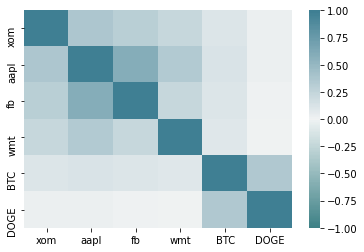

In [6]:
sns.heatmap(crypto.pct_change(1).corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(200, 220, n=200))

<AxesSubplot:xlabel='Date'>

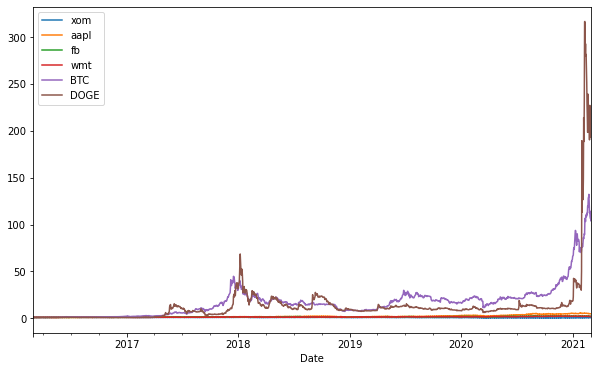

In [7]:
#Normalize cryptos df
crypto_norm = crypto/crypto.iloc[0]
crypto_norm.plot(figsize=(10,6))

In [8]:
#Calculating daily returns using pandas method
crypto_daily_return = crypto.pct_change(1)
crypto_daily_return.head()

,xom,aapl,fb,wmt,BTC,DOGE
Date,,,,,,
2016-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-02,0.017470,0.002188,0.001184,-0.003762,-0.025588,-0.020080
2016-03-03,-0.003628,0.007444,-0.003365,-0.001057,-0.005514,0.004098
2016-03-04,-0.001335,0.014877,-0.010860,0.009676,-0.025405,-0.028571
2016-03-05,0.000000,0.000000,0.000000,0.000000,-0.025232,-0.058824


In [9]:
#Calculating log returns
log_return = np.log(crypto/crypto.shift(1))
log_return.head()

,xom,aapl,fb,wmt,BTC,DOGE
Date,,,,,,
2016-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-02,0.017320,0.002186,0.001183,-0.003769,-0.025921,-0.020285
2016-03-03,-0.003634,0.007417,-0.003371,-0.001058,-0.005530,0.004090
2016-03-04,-0.001336,0.014767,-0.010919,0.009630,-0.025733,-0.028988
2016-03-05,NaN,NaN,NaN,NaN,-0.025556,-0.060625


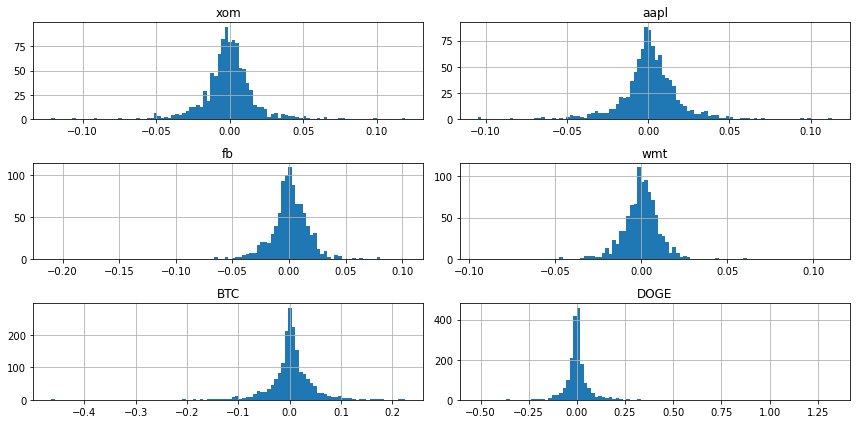

In [10]:
log_return.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [11]:
log_return.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
xom,984.0,-0.000669,0.017582,-0.121422,-0.007873,-0.000731,0.006984,0.119442
aapl,984.0,0.001010,0.018229,-0.104924,-0.006487,0.000644,0.009186,0.113157
fb,984.0,0.000827,0.019979,-0.210239,-0.007124,0.001025,0.010520,0.102704
wmt,984.0,0.000330,0.013689,-0.095092,-0.005596,0.000291,0.005996,0.110723
BTC,1819.0,0.002573,0.040306,-0.464730,-0.011751,0.002282,0.018071,0.225119
DOGE,1819.0,0.002909,0.073237,-0.515118,-0.020482,0.000000,0.018352,1.323469


In [12]:
# Using total number of days in a year 253
log_return.mean() * 253

xom    -0.169332
aapl    0.255563
fb      0.209250
wmt     0.083395
BTC     0.650876
DOGE    0.736085
dtype: float64

In [13]:
# Covariance in 253 days
log_return.cov() * 253

,xom,aapl,fb,wmt,BTC,DOGE
xom,0.078212,0.029526,0.026806,0.012306,0.028768,0.023070
aapl,0.029526,0.084070,0.051540,0.019542,0.031654,0.026406
fb,0.026806,0.051540,0.100987,0.012678,0.028308,0.017702
wmt,0.012306,0.019542,0.012678,0.047407,0.017917,0.005970
BTC,0.028768,0.031654,0.028308,0.017917,0.411023,0.345570
DOGE,0.023070,0.026406,0.017702,0.005970,0.345570,1.357020


In [35]:
# Code from Mushfiqur Rahman link: https://github.com/mrmushfiq/python_meets_finance/blob/master/Portfolio_optimization/efficient_frontier_Portfolio_optimization.ipynb

num_runs = 10000

all_weights = np.zeros((num_runs,len(crypto.columns)))
ret_arr = np.zeros(num_runs)
vol_arr = np.zeros(num_runs)
sharpe_arr = np.zeros(num_runs)

for ind in range(num_runs):

    # Create Random Weights
    weights = np.array(np.random.random(6))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_return.mean() * weights) *253)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 253, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
    
    data = {'Returns':ret_arr, 'Volatility':vol_arr}

for counter, symbol in enumerate(crypto.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in all_weights]

In [36]:
sharpe_arr.max()

1.2486382256043027

In [37]:
sharpe_arr.argmax()

6031

In [38]:
all_weights[9683,:]

array([0.06730706, 0.32014792, 0.32652857, 0.12015213, 0.12376736,
       0.04209696])

In [39]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

print('Return with Maximum SR')
print(max_sr_ret)
print('Volality with Maximum SR')
print(max_sr_vol)

Return with Maximum SR
0.355096551335183
Volality with Maximum SR
0.2843870578792565


In [40]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,xom weight,aapl weight,fb weight,wmt weight,BTC weight,DOGE weight
0,0.264957,0.270428,0.225577,0.201495,0.197998,0.065683,0.268535,0.040714
1,0.253961,0.263997,0.220817,0.170257,0.221396,0.100487,0.213053,0.073990
2,0.239350,0.294549,0.190737,0.139695,0.245256,0.190365,0.040528,0.193419
3,0.240911,0.362876,0.323630,0.267764,0.018374,0.093131,0.035457,0.261644
4,0.295570,0.270908,0.072346,0.164020,0.214069,0.258431,0.173006,0.118128


In [98]:
# Find weights based on desired ranges of return and volatitilities
seach_df = portfolios.loc[(portfolios['Returns'] >= 0.49) & (portfolios['Returns'] <= 0.51)]
seach_df = seach_df.loc[(seach_df['Volatility'] >= 0.44) & (seach_df['Volatility'] <= 0.46)]
seach_df

,Returns,Volatility,xom weight,aapl weight,fb weight,wmt weight,BTC weight,DOGE weight
5000,0.498508,0.454072,0.035487,0.117725,0.175141,0.022693,0.490505,0.158449


## Effective frontier


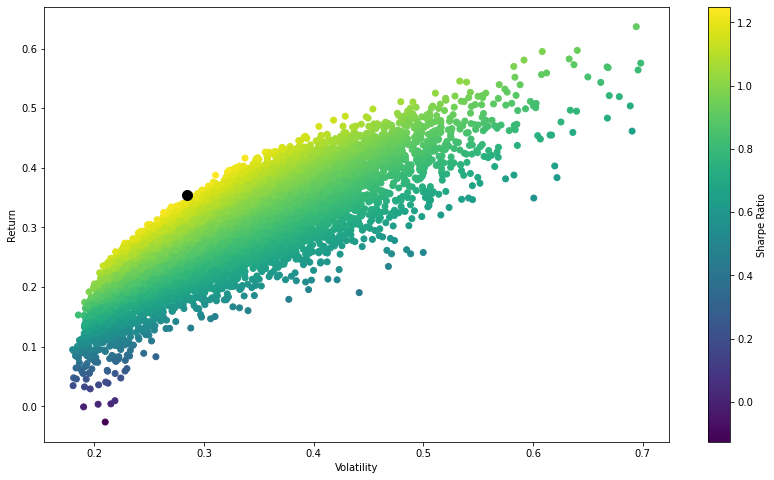

In [105]:
plt.figure(figsize=(14,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='black',s=100,edgecolors='black')
#plt.scatter(0.45,0.5,c='black',s=50,edgecolors='black')